### Track 1. 한국 음식 이미지 분류
##### https://www.kaggle.com/competitions/2021-data-creator-camp-1120-1/data
##### 2021 데이터 크리에이터 캠프 (NIA 주최 데이터 분석 대회)에 출제된 문제입니다.
##### 학습데이터 : 3496 장 / 검증데이터 : 689 장 / 평가데이터 : 958 장으로 구성되어 있지만, 평가데이터에 대한 정답지가 없기 때문에 학습데이터 학습하고, 검증데이터로 평가하도록 하겠습니다 (평가데이터는 무시해주세요)
##### target은 BoiledDown (조림) / Rice (밥) / Noodle (면) / Roasted (구이) / Kimchi (김치) 총 5개로 구성되어 있습니다.
##### hhttps://drive.google.com/file/d/1wBJRhn7R_puujj_2LXjq-xvG03LucaFO/view?usp=drive_link


In [1]:
!pwd

/content


In [2]:
%cd /content/drive/MyDrive/랩실/2024_DLMATHon

/content/drive/MyDrive/랩실/2024_DLMATHon


In [3]:
%ls

 2021-data-creator-camp-1120-1.zip   DLMATHon.ipynb  'Korean Food Image Classification.ipynb'
 ddubuk_cls.zip                      kfood/


In [4]:
!unzip -qq "/content/drive/MyDrive/랩실/2024_DLMATHon/2021-data-creator-camp-1120-1.zip"

## 1. 로컬 데이터를 이용하여 데이터셋 만드는 과정

In [33]:
import matplotlib.pyplot as plt
import matplotlib
import torch
import numpy as np
from torch import nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets

In [34]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 2.3.1+cu121  Device: cuda


In [35]:
BATCH_SIZE = 32
EPOCHS = 10

In [36]:
train_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
val_transforms = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])

In [37]:
trainset = datasets.ImageFolder(root = "/content/drive/MyDrive/랩실/2024_DLMATHon/kfood/train", transform=train_transforms)
valset = datasets.ImageFolder(root = "/content/drive/MyDrive/랩실/2024_DLMATHon/kfood/val", transform=val_transforms)

In [40]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE, shuffle=False)

In [41]:
for (X_train, y_train) in trainloader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 3, 224, 224]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


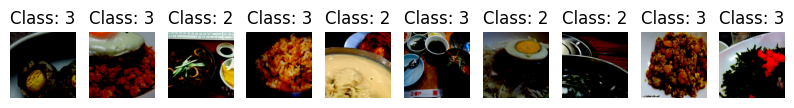

In [42]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

In [59]:
import torchvision.models as models
model = models.resnet50(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [61]:
for parameter in model.parameters():
  parameter.requires_grad = False

In [62]:
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 5)
)
model = model.to(device)

In [63]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [64]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(device, dtype=torch.float)
        label = label.to(device, dtype=torch.long)
        optimizer.zero_grad()
        output = model(image).squeeze(dim=1)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image),
                len(train_loader.dataset), 100. * batch_idx / len(train_loader),
                loss.item()))

In [65]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(device, dtype=torch.float)
            label = label.to(device, dtype=torch.long)
            output = model(image).squeeze(dim=1)
            test_loss += criterion(output, label).item()

            pr = torch.softmax(output, dim=1)

            _, predicted = torch.max(pr, 1)

            correct += (predicted.cpu() == label.cpu()).sum().item()

    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [66]:
for epoch in range(1, EPOCHS + 1):
    train(model, trainloader, optimizer, log_interval = 5)
    valid_loss, valid_accuracy = evaluate(model, valloader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, valid_loss, valid_accuracy))

Train Epoch: 1 [0/3490 (0%)]	Train Loss: 1.615727
Train Epoch: 1 [160/3490 (5%)]	Train Loss: 1.528801
Train Epoch: 1 [320/3490 (9%)]	Train Loss: 1.423072
Train Epoch: 1 [480/3490 (14%)]	Train Loss: 1.332404
Train Epoch: 1 [640/3490 (18%)]	Train Loss: 1.355016
Train Epoch: 1 [800/3490 (23%)]	Train Loss: 1.252761
Train Epoch: 1 [960/3490 (27%)]	Train Loss: 1.287377
Train Epoch: 1 [1120/3490 (32%)]	Train Loss: 1.168495
Train Epoch: 1 [1280/3490 (36%)]	Train Loss: 1.239359
Train Epoch: 1 [1440/3490 (41%)]	Train Loss: 1.032776
Train Epoch: 1 [1600/3490 (45%)]	Train Loss: 1.077298
Train Epoch: 1 [1760/3490 (50%)]	Train Loss: 0.998181
Train Epoch: 1 [1920/3490 (55%)]	Train Loss: 0.971419
Train Epoch: 1 [2080/3490 (59%)]	Train Loss: 1.029698
Train Epoch: 1 [2240/3490 (64%)]	Train Loss: 1.042112
Train Epoch: 1 [2400/3490 (68%)]	Train Loss: 1.007124
Train Epoch: 1 [2560/3490 (73%)]	Train Loss: 0.705868
Train Epoch: 1 [2720/3490 (77%)]	Train Loss: 0.878719
Train Epoch: 1 [2880/3490 (82%)]	Train L